### EDA for train & test data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback


In [2]:
import plotly.graph_objects as go
import plotly.express as px

In [3]:
# check train test data

train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')

print('--train--')
print(train.shape)
print(train.columns)
print('\n')

print('--test--')
print(test.head())
print('\n')

--train--
(2016, 8)
Index(['beds', 'baths', 'size', 'size_units', 'lot_size', 'lot_size_units',
       'zip_code', 'price'],
      dtype='object')


--test--
   beds  baths    size size_units  lot_size lot_size_units  zip_code  \
0     3    3.0  2850.0       sqft   4200.00           sqft     98119   
1     4    5.0  3040.0       sqft   5002.00           sqft     98106   
2     3    1.0  1290.0       sqft   6048.00           sqft     98125   
3     3    2.0  2360.0       sqft      0.28           acre     98188   
4     3    3.5  1942.0       sqft   1603.00           sqft     98107   

       price  
0  1175000.0  
1  1057500.0  
2   799000.0  
3   565000.0  
4  1187000.0  




In [4]:
print("there's {0} rows use acre as units.".format(train[train['lot_size_units'] == 'acre'].shape[0]))

there's 220 rows use acre as units.


In [5]:
train['lot_size_units'].unique()

array(['sqft', 'acre', nan], dtype=object)

In [6]:
train.describe()

,beds,baths,size,lot_size,zip_code,price
count,2016.000000,2016.000000,2016.000000,1669.000000,2016.000000,2.016000e+03
mean,2.857639,2.159970,1735.740575,3871.059694,98123.638889,9.636252e+05
std,1.255092,1.002023,920.132591,2719.402066,22.650819,9.440954e+05
min,1.000000,0.500000,250.000000,0.230000,98101.000000,1.590000e+05
25%,2.000000,1.500000,1068.750000,1252.000000,98108.000000,6.017500e+05
50%,3.000000,2.000000,1560.000000,4000.000000,98117.000000,8.000000e+05
75%,4.000000,2.500000,2222.500000,6000.000000,98126.000000,1.105250e+06
max,15.000000,9.000000,11010.000000,9998.000000,98199.000000,2.500000e+07


In [7]:
train.corr()

,beds,baths,size,lot_size,zip_code,price
beds,1.000000,0.652853,0.771929,0.291257,0.077811,0.293516
baths,0.652853,1.000000,0.667655,0.016913,-0.002679,0.317325
size,0.771929,0.667655,1.000000,0.272596,0.070557,0.444140
lot_size,0.291257,0.016913,0.272596,1.000000,0.160922,0.091780
zip_code,0.077811,-0.002679,0.070557,0.160922,1.000000,-0.047189
price,0.293516,0.317325,0.444140,0.091780,-0.047189,1.000000


In [8]:
train['size_units'].unique()

array(['sqft'], dtype=object)

In [9]:
# train.loc[train['lot_size_units'] == 'acre', 'lot_size'] = train['lot_size'] * 43560
arc = train[train['lot_size_units'] == 'acre']
train = train[~(train['lot_size_units'] == 'acre')]
arc['lot_size'] = arc['lot_size'] * 43560

arc['lot_size_units'] = 'sqft'

df = train.append(arc).reset_index(drop = True)
df



,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.0,sqft,98144,795000.0
1,4,3.0,2040.0,sqft,3783.0,sqft,98107,950000.0
2,4,3.0,3800.0,sqft,5175.0,sqft,98199,1950000.0
3,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0
4,1,1.0,670.0,sqft,6000.0,sqft,98133,460000.0
...,...,...,...,...,...,...,...,...
2011,1,1.0,865.0,sqft,54885.6,sqft,98112,712500.0
2012,4,3.5,4990.0,sqft,10890.0,sqft,98112,4815000.0
2013,2,2.0,839.0,sqft,23086.8,sqft,98125,385000.0
2014,2,2.0,1400.0,sqft,14810.4,sqft,98199,699950.0


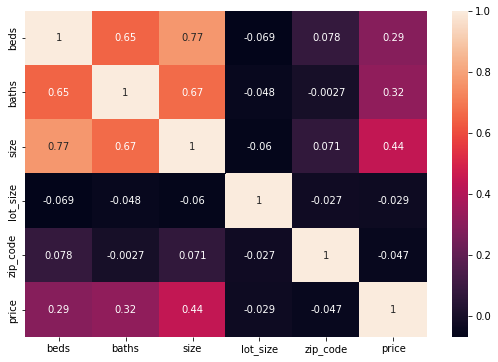

In [10]:
#Heat map

plt.figure(figsize = (9, 6))
sns.heatmap(df.corr(), annot=True)
plt.show()

The house price is mainly effected by # of beds, # of bathrooms & # of house sizes. 
- on the other hand, the price and community does not have very big effect tho.

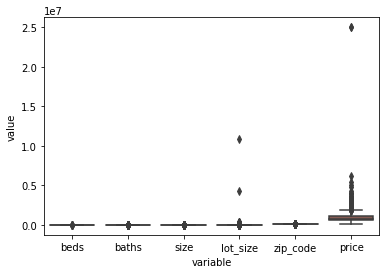

In [11]:
# box plot for all features

sns.boxplot(x="variable", y="value", data=pd.melt(df.drop(['size_units', 'lot_size_units'], 
                                                            axis = 1)))
plt.show()

In [12]:
pd.melt(df)

,variable,value
0,beds,3
1,beds,4
2,beds,4
3,beds,2
4,beds,1
...,...,...
16123,price,712500
16124,price,4.815e+06
16125,price,385000
16126,price,699950


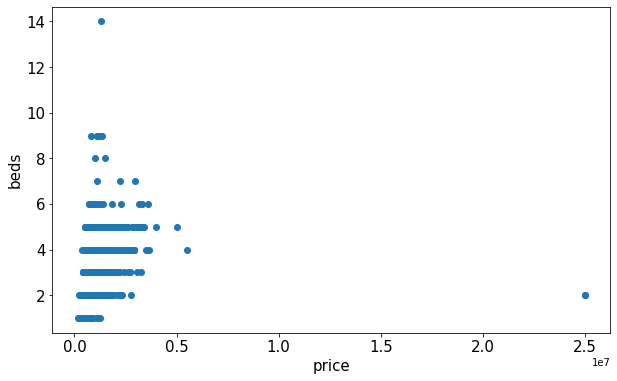

In [13]:
plt.figure(figsize = ( 10, 6))

plt.scatter(train['price'],
            train['beds'])

plt.xlabel('price', fontsize = 15)
plt.ylabel('beds', fontsize = 15)

plt.tick_params(axis='both', which='major', labelsize=15)

plt.show()

In [14]:
fig = px.scatter(train, x='size', y='price', color='beds',
                symbol= 'baths')
fig.show()


In [15]:
print('original train length: %s' %(len(train)))
# remove possible outliers for 3 std

mean, std = np.mean(train['price']),  np.std(train['price'])

# remove the one larger than 3 std

train_filtered = train[~(train['price'] > mean + 3 * std)]
print('updated train length: %s' %(len(train_filtered)))
 

original train length: 1796
updated train length: 1791


In [16]:
train_filtered.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.0,sqft,98144,795000.0
2,4,3.0,2040.0,sqft,3783.0,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.0,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0
6,1,1.0,670.0,sqft,6000.0,sqft,98133,460000.0


In [17]:
# plot the filtered data again

fig = px.scatter(train_filtered, x='size', y='price',
                 hover_name='zip_code',
                 opacity = 0.5,
                 size = 'price',
                 title = 'House price vs size distribution'.title(),
                     custom_data=['beds', 'baths', 'zip_code'],
                     text = 'price',
                     trendline='ols',
                     trendline_scope="overall",
                     trendline_color_override="grey",
                                 )

# fig.update_traces( hovertemplate ='<br>'.join([
#             'Price: $%{text:,}',
#             'Size: %{x}',
#             'bed: %{customdata[0]}',
#             'bath: %{customdata[1]}',
#                            ]),
#                     )
# fig.update_layout(hovermode="x")

fig.show()

In [18]:
train_filtered.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.0,sqft,98144,795000.0
2,4,3.0,2040.0,sqft,3783.0,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.0,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0
6,1,1.0,670.0,sqft,6000.0,sqft,98133,460000.0


In [19]:
print(len(train_filtered)), print(len(test))

1791
505


(None, None)

In [33]:
train_filtered.corr()

,beds,baths,size,lot_size,zip_code,price
beds,1.000000,0.558082,0.685375,0.247868,0.036467,0.449865
baths,0.558082,1.000000,0.586181,-0.070256,-0.054044,0.507522
size,0.685375,0.586181,1.000000,0.301411,0.047433,0.752748
lot_size,0.247868,-0.070256,0.301411,1.000000,0.269740,0.141983
zip_code,0.036467,-0.054044,0.047433,0.269740,1.000000,-0.058782
price,0.449865,0.507522,0.752748,0.141983,-0.058782,1.000000


In [44]:
# size vs price visual

def size_price_bar(df):
    '''
    bar plot for size and price visual
    '''

    # cut size into bars
    df['size_bin']  = pd.cut(df['size'], bins=5, precision = 0)
    size_price = df.groupby(['size_bin'])['price'].mean()
    size_price.plot(kind = 'bar', rot = 0, figsize = ( 9, 6))

    #  box plot



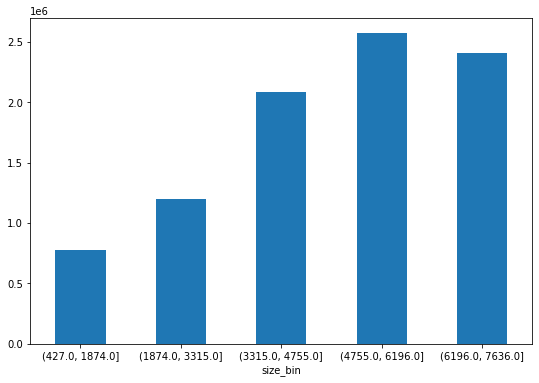

In [45]:
size_price_bar(train_filtered)

## deeplearning model

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler

In [21]:
train_filtered.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.0,sqft,98144,795000.0
2,4,3.0,2040.0,sqft,3783.0,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.0,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0
6,1,1.0,670.0,sqft,6000.0,sqft,98133,460000.0


In [22]:
## simple modeling

train_filtered.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.0,sqft,98144,795000.0
2,4,3.0,2040.0,sqft,3783.0,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.0,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0
6,1,1.0,670.0,sqft,6000.0,sqft,98133,460000.0


In [23]:
# scale the data

train_filtered = train_filtered[~((train_filtered['size_units'] != 'sqft') | (train_filtered['lot_size_units'] != 'sqft'))]
test = test[~((test['size_units'] != 'sqft') & (test['lot_size_units'] != 'sqft'))]

cols = ['beds', 'baths', 'size', 'lot_size', 'zip_code', 'price' ]
strain_filtered = train_filtered[cols]
stest = test[cols]
stest = stest.dropna()
# min max scaler

scaler = MinMaxScaler()
strain = scaler.fit_transform(strain_filtered)
stest = scaler.transform(stest)



In [24]:
x_train = strain[:, :-1]
y_train = strain[:, -1]


x_test = stest[:, :-1]
y_test = stest[:, -1]


In [25]:
x_train.shape

(1444, 5)

In [26]:
def get_model ():
    model = Sequential()
    model.add(Dense(128, input_shape=(5,), activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(1, activation='relu'))

    optimizer = tf.keras.optimizers.Adam(lr=0.01)

    model.compile(
        loss = 'mean_squared_error',
        optimizer = optimizer,
    )
    
    return model


get_model().summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               768       
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 9,089
Trainable params: 9,089
Non-trainable params: 0
_________________________________________________________________


In [27]:
es_cb = EarlyStopping(monitor='val_loss', patience=10)

model = get_model()

# preds_on_untrained = model.predict(x_test)

history = model.fit(
    x_train, y_train,
    validation_data = (x_test, y_test),
    epochs = 100,
    # callbacks = [es_cb],
    verbose = 0

)

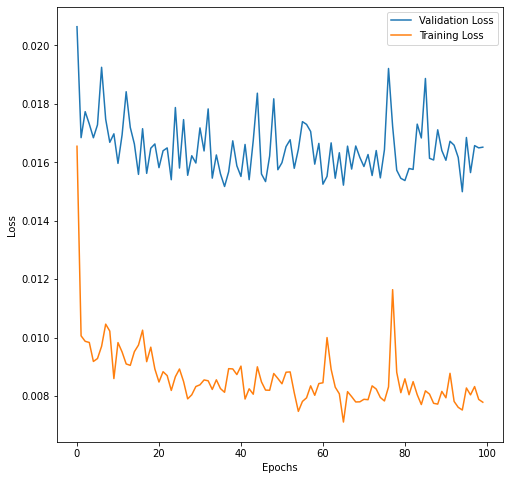

In [28]:
def plot_loss(history):
    h = history.history
    x_lim = len(h['loss'])
    plt.figure(figsize=(8, 8))
    plt.plot(range(x_lim), h['val_loss'], label = 'Validation Loss')
    plt.plot(range(x_lim), h['loss'], label = 'Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    return

plot_loss(history)

In [29]:
yhat = model.predict(x_test)

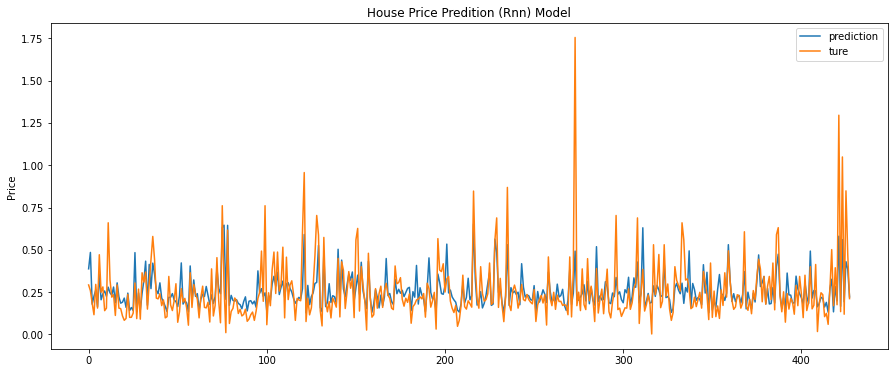

In [30]:
plt.figure(figsize = ( 15, 6))

x = range(len(yhat))

plt.plot(x, yhat, label = 'prediction')
plt.plot(x, y_test,
        label = 'ture')

plt.ylabel('Price')
plt.legend()
plt.title('house price predition (RNN) model'.title())
plt.show()

# result oveview

In [51]:
from sklearn.metrics import mean_squared_error


In [52]:
# compare yhat and y test

yhat = [float(x) for x in yhat]
mean_squared_error(yhat, y_test)

0.01651795623622794